# **Lab Excercise-10:Building an Autoencoder for Unsupervised Feature Learning**

* Created By : Blessy Louis (2348416)
* Created On : 13.09.2024
* Submitted On: 13.09.2024

## **Import Libraries**



### 1. **Google Colab Libraries**

- **`google.colab`**: This module contains utilities specific to Google Colab. Here, it is used to upload files from your local system to the Colab environment.

    - **`files.upload()`**: Opens a file picker dialog that allows you to upload files from your local system to the Colab environment.

### 2. **Standard Libraries**

- **`zipfile`**: Part of Python’s standard library, used for reading and extracting files from zip archives.
  
    - **`zipfile.ZipFile`**: Provides tools for working with ZIP files. `extractall()` extracts all the files in the archive to the specified directory.

- **`os`**: A standard Python library used for interacting with the operating system.
  
    - **`os.listdir()`**: Lists the files and directories in the specified directory.

### 3. **Image Processing Libraries**

- **`cv2` (OpenCV)**: A widely used library for computer vision tasks.
  
    - **`cv2.imread()`**: Reads an image from the file system. Here, it reads images in grayscale mode.
    - **`cv2.resize()`**: Resizes an image to a specified width and height.

- **`numpy`**: A fundamental package for scientific computing in Python, used for handling arrays and performing mathematical operations.
  
    - **`numpy.array()`**: Converts a list or other data structure into a NumPy array.
    - **`numpy.astype()`**: Converts the data type of an array.

### 4. **Machine Learning and Deep Learning Libraries**

- **`tensorflow`**: An open-source platform for machine learning, which includes the Keras API for building neural networks.

    - **`tensorflow.keras.models.Model`**: A class for defining Keras models.
    - **`tensorflow.keras.layers.Input`, `Dense`, `Flatten`, `Reshape`, `Conv2D`, `Conv2DTranspose`**: Layers used to build the neural network.
        - **`Input`**: Defines the input shape.
        - **`Dense`**: Fully connected layer.
        - **`Flatten`**: Flattens the input into a 1D array.
        - **`Reshape`**: Reshapes the data into a specified shape.
        - **`Conv2D`**: Convolutional layer for extracting features from images.
        - **`Conv2DTranspose`**: Transposed convolutional layer for upsampling and reconstructing images.

    - **`tensorflow.keras.optimizers.Adam`**: An optimizer used for training the model.
    - **`tensorflow.keras.losses.binary_crossentropy`**: Loss function used for binary classification problems.

### 5. **Data Analysis and Visualization Libraries**

- **`sklearn` (Scikit-learn)**: A library for machine learning, including tools for preprocessing, model selection, and evaluation.

    - **`sklearn.model_selection.train_test_split`**: Splits the dataset into training and testing sets.
    - **`sklearn.metrics.mean_squared_error`**: Computes the mean squared error between true and predicted values.
    - **`sklearn.decomposition.PCA`**: Principal Component Analysis for dimensionality reduction.

- **`matplotlib.pyplot`**: A plotting library used for creating static, animated, and interactive visualizations in Python.

    - **`plt.plot()`**: Plots data on a graph.
    - **`plt.scatter()`**: Creates a scatter plot.
    - **`plt.imshow()`**: Displays an image.
    - **`plt.figure()`**: Creates a new figure for plotting.
    - **`plt.subplot()`**: Adds subplots to a figure.

### Summary

1. **`google.colab`**: File upload utility for Colab.
2. **`zipfile`** and **`os`**: For handling file extraction and directory operations.
3. **`cv2` (OpenCV)** and **`numpy`**: For image processing and array handling.
4. **`tensorflow`**: For building and training the autoencoder model.
5. **`sklearn`**: For splitting data, calculating reconstruction errors, and dimensionality reduction.
6. **`matplotlib.pyplot`**: For visualizing training loss and image reconstructions.


Load Data

The dataset you're using focuses on **binary image classification** of facial expressions, distinguishing between **sad** and **happy faces**. Here's a breakdown of the key details:

### Dataset Structure:
- **Number of Classes**: 2 (Sad Faces, Happy Faces)
- **Total Images**: 165
  - **Sad Faces**: 73 images
  - **Happy Faces**: 92 images
- **Image Formats**: JPEG, PNG, or similar standard formats


In [1]:
from google.colab import files
import zipfile
import os

# Upload the zip file
uploaded = files.upload()

# Extract the zip file
zip_file = 'archive (13).zip'  # replace with the correct file name if different
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('archive')

# Check the extracted contents
os.listdir('archive')


Saving archive (13).zip to archive (13) (1).zip


['face_classification']

In [3]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Define paths
happy_path = 'archive/face_classification/happy_person_face/'
sad_path = 'archive/face_classification/sad_person_face/'

# Function to load images
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (64, 64))  # Resize to a fixed size
            images.append(img)
    return images

happy_images = load_images_from_folder(happy_path)
sad_images = load_images_from_folder(sad_path)

# Combine and preprocess data
images = np.array(happy_images + sad_images)
images = images.astype('float32') / 255.0  # Normalize to [0, 1]

# Split data
X_train, X_test = train_test_split(images, test_size=0.2, random_state=42)


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Conv2D, Conv2DTranspose

# Define the autoencoder architecture
input_img = Input(shape=(64, 64, 1))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Flatten()(x)
encoded = Dense(64, activation='relu')(x)

# Decoder
x = Dense(64 * 64 * 64, activation='relu')(encoded)
x = Reshape((64, 64, 64))(x)
x = Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
decoded = Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)

# Build and compile the autoencoder
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [5]:
# Train the autoencoder
history = autoencoder.fit(X_train, X_train,
                          epochs=50,
                          batch_size=32,
                          shuffle=True,
                          validation_data=(X_test, X_test))


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - loss: 0.6891 - val_loss: 0.6540
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - loss: 0.6583 - val_loss: 0.6483
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - loss: 0.6324 - val_loss: 0.6445
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - loss: 0.6195 - val_loss: 0.6226
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - loss: 0.6149 - val_loss: 0.6096
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - loss: 0.5893 - val_loss: 0.5988
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - loss: 0.5957 - val_loss: 0.6074
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - loss: 0.5922 - val_loss: 0.6094
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - loss: 0.5891 - val_loss: 0.5902
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - loss: 0.5846 - val_loss: 0.5923
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - loss: 0.5769 - val_loss: 0.5972
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - loss: 0.5808 - val_loss: 0.5929
Epoch 13/50
5

In [6]:
# Evaluate on test data
loss = autoencoder.evaluate(X_test, X_test)
print(f"Reconstruction Loss: {loss}")

# Predict on test data
reconstructed_images = autoencoder.predict(X_test)

# Calculate mean squared error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(X_test.reshape(-1), reconstructed_images.reshape(-1))
print(f"Mean Squared Error: {mse}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.5359 
Reconstruction Loss: 0.5353427529335022
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step
Mean Squared Error: 0.04118227958679199


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


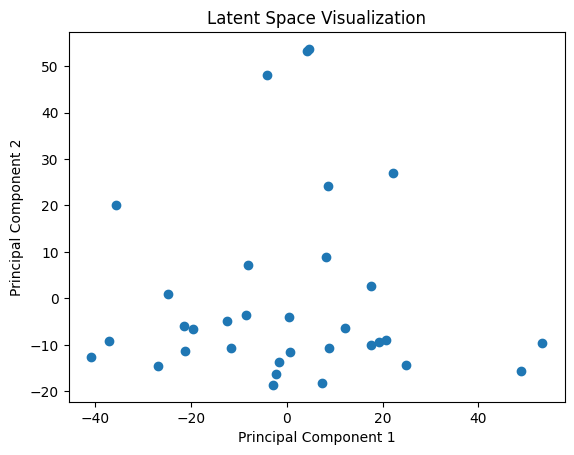

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Extract encoder model
encoder = Model(inputs=autoencoder.input, outputs=encoded)

# Get encoded features
encoded_images = encoder.predict(X_test)

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
encoded_images_2d = pca.fit_transform(encoded_images)

# Plot the latent space
plt.scatter(encoded_images_2d[:, 0], encoded_images_2d[:, 1])
plt.title('Latent Space Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


This plot represents a **Latent Space Visualization** using two principal components, likely from a dimensionality reduction technique such as **Principal Component Analysis (PCA)**, applied to the latent space of a model (likely an autoencoder or a variational autoencoder).

### Interpretation:

1. **Latent Space**:
   - The latent space is where the high-dimensional input data (original features) are compressed into a lower-dimensional space. This visualization maps the data points onto two principal components, which capture the most variance from the latent representations.
   
2. **Distribution of Points**:
   - The points are scattered without any obvious clustering, suggesting that the latent space is not grouping the data into distinct clusters. This could indicate that the model hasn't learned very distinct features to separate different categories (if this is a classification problem) or patterns within the data.

3. **Principal Component 1 and 2**:
   - These are the two components that capture the largest variance in the latent space.
   - The spread across the x-axis (Principal Component 1) and y-axis (Principal Component 2) shows the variance in the data after dimensionality reduction.
   - Some points are further apart, suggesting that those data points vary more significantly in the latent space, while others are closer, indicating more similarity in their latent representation.

### Potential Analysis:
- **Cluster Formation**: If you're expecting distinct clusters (e.g., different classes), but don't see them here, it might suggest that the model's latent space isn't well-formed, or the input data doesn't have clear separations.
- **Dimensionality Reduction**: Depending on the method used (likely PCA here), you may want to experiment with other methods (like t-SNE or UMAP) to see if they provide better visual separations in the latent space.
- **Further Tuning**: If you're working with an autoencoder, this visualization can guide you in adjusting the architecture or regularization to create a more meaningful latent space representation.


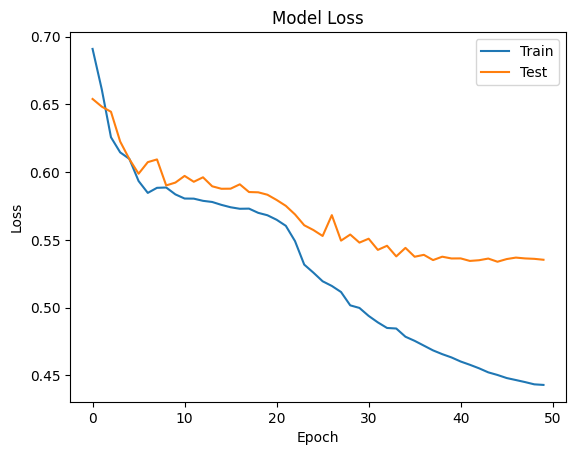

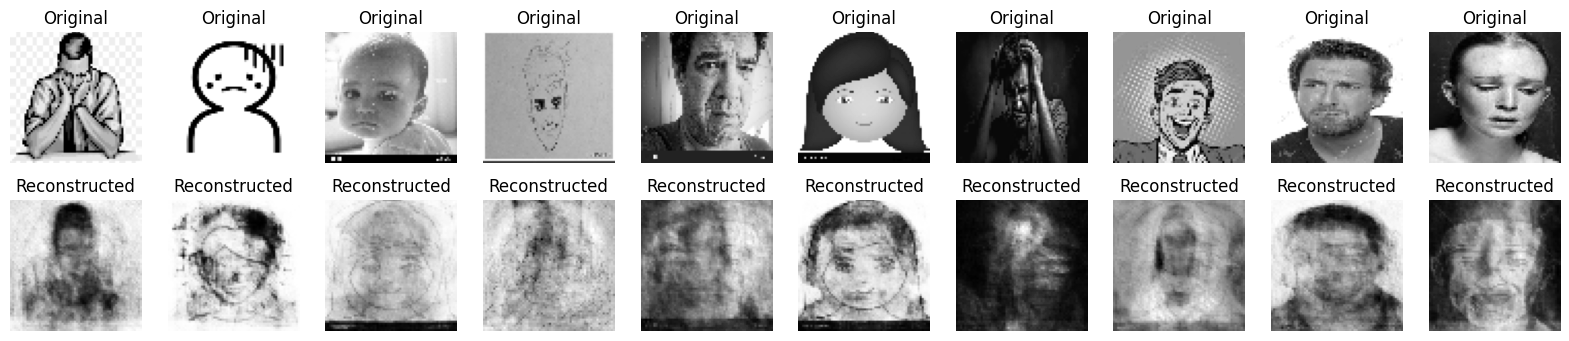

In [8]:
# Plot training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Visualize some reconstructed images
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(64, 64), cmap='gray')
    ax.set_title("Original")
    ax.axis('off')

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i].reshape(64, 64), cmap='gray')
    ax.set_title("Reconstructed")
    ax.axis('off')
plt.show()


The plot represents the **model loss** over epochs for both the **training** and **test** sets.

### Key Observations:
1. **Training Loss (blue line)**:
   - The training loss decreases steadily throughout the 50 epochs, which indicates that the model is learning well from the training data. The consistent downward trend suggests no overfitting on the training set.
   
2. **Test Loss (orange line)**:
   - The test loss initially decreases but then fluctuates after around 10-15 epochs. It does not decrease as smoothly as the training loss and plateaus after around 20 epochs.
   - The gap between the training loss and test loss widens significantly after about 20 epochs, which indicates **overfitting**. This suggests that while the model is learning the training data very well, it is not generalizing effectively to the test data.

### Analysis:
- **Overfitting**: Since the test loss doesn't continue to decrease and instead fluctuates, while the training loss decreases, the model is likely overfitting to the training data after around 20 epochs. This can happen when the model becomes too specialized in the training set and fails to generalize to unseen data (test set).
  
### Recommendations:
- **Early Stopping**: Implement early stopping to halt training when the test loss starts to fluctuate or increase, likely around the 15-20 epoch mark.
- **Regularization**: Introduce techniques like dropout or L2 regularization to reduce overfitting.
- **Model Complexity**: Consider reducing the complexity of the model (e.g., fewer layers or neurons) to help it generalize better.

This plot shows that further tuning could improve the generalization performance of the model, especially by preventing overfitting.